In [0]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [3]:
print(cv.__version__)

3.4.3


In [0]:
import numpy as np
import math
from operator import itemgetter
import urllib
from google.colab import files
import matplotlib.pyplot as plt


In [0]:
degree_range = 30
radian_range = math.radians(degree_range)
radius_range = 50

In [0]:

def distance(p1,p2,mode="L2"): 
    p1 = np.array(p1)
    p2 = np.array(p2)
    if mode == "L1":
        return np.linalg.norm(p1-p2,1)
    elif mode == "L2":
        return np.linalg.norm(p1-p2)

def implot(rgb):
    bgr = cv.cvtColor(rgb, cv.COLOR_BGR2RGB)
  #     plt.imshow(bgr)
#     plt.show()
    cv2_imshow(rgb)

def imread(url):
    data = urllib.request.urlopen(url)
    data = data.read()

    arr = np.fromstring(data, np.uint8)
    return cv.imdecode(arr, 1)

In [0]:
def read_mnt(file_path):
    data = urllib.request.urlopen(file_path)
    data = data.read().decode("utf-8")
    lines = data.split("\n")
#     print(lines)
    result = []
    for line in lines[2:]:
        data = line.split(" ")
        if len(data) < 3:
          continue
        data_dict = {}
        data_dict['x'] = int(data[0])
        data_dict['y'] = int(data[1])
        data_dict['rad'] = float(data[2])
        result.append(data_dict)
    print(result[:10])
    return result


In [0]:
def draw_mnt(img, mnt_point):
    font = cv.FONT_HERSHEY_SIMPLEX
    for i, p in enumerate(mnt_point):
        center = (p['x'], p['y'])
        radian = p['rad']

        r = 6
        color = [255, 0, 0]
        border = 1

        x_new = p['x'] + int(r*2 * math.cos(radian))
        y_new = p['y'] + int(r*2 * math.sin(radian))

        cv.circle(img, center, r, color, border)
        cv.line(img, center, (x_new, y_new), color, border)
        cv.putText(img, str(i), center, font, 0.25, (0, 0, 0), 1, cv.LINE_AA)
    return img




In [0]:
def group_minutiae(mnt_point, mnt_img):
    """
            Group mintiae by radius and radian
        """
    

    r = 6
    color = [255, 0, 0]
    border = -1

    length_mnt = len(mnt_point)
    mnt_group = []

    for i in range(length_mnt):
        mnt = {}
        mnt['index'] = i
        mnt['child'] = []

        xi = mnt_point[i]['x']
        yi = mnt_point[i]['y']
        radi = mnt_point[i]['rad']
        pi = [xi, yi]

        result = mnt_img.copy()

        # cv.circle(result, tuple(pi), r, (255, 255, 0), border)
        # cv.circle(result, tuple(pi), radius_range, (255, 255, 0), 1)
        # cv.waitKey(-1)

        for j in range(length_mnt):
            if i == j:
                continue

            xj = mnt_point[j]['x']
            yj = mnt_point[j]['y']
            radj = mnt_point[j]['rad']

            pj = [xj, yj]

            # print(i, j, distance(pi, pj), distance([radi], [radj], "L1"))

            if distance(pi, pj) <= radius_range and distance([radi], [radj], "L1") <= radian_range:
                mnt['child'].append(j)
                cv.circle(result, tuple(pj), r, color, border)

            # cv.imshow("Group"+str(i), result)

        mnt['density'] = len(mnt['child'])
        mnt_group.append(mnt)

        # cv.imshow("Group"+str(i), result)
        # cv.waitKey(-1)
        # cv.destroyWindow("Group"+str(i))
# def find_density_of_minutiae(radius):
    mnt_group = sorted(mnt_group, key=itemgetter('density'),reverse=True)
    return mnt_group




original image

[{'x': 365, 'y': 646, 'rad': 3.787364}, {'x': 317, 'y': 514, 'rad': 1.658063}, {'x': 342, 'y': 497, 'rad': 1.623156}, {'x': 442, 'y': 678, 'rad': 3.717551}, {'x': 474, 'y': 677, 'rad': 3.577925}, {'x': 380, 'y': 403, 'rad': 2.216568}, {'x': 261, 'y': 618, 'rad': 5.148721}, {'x': 586, 'y': 354, 'rad': 0.575959}, {'x': 326, 'y': 564, 'rad': 1.518436}, {'x': 353, 'y': 579, 'rad': 1.169371}]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


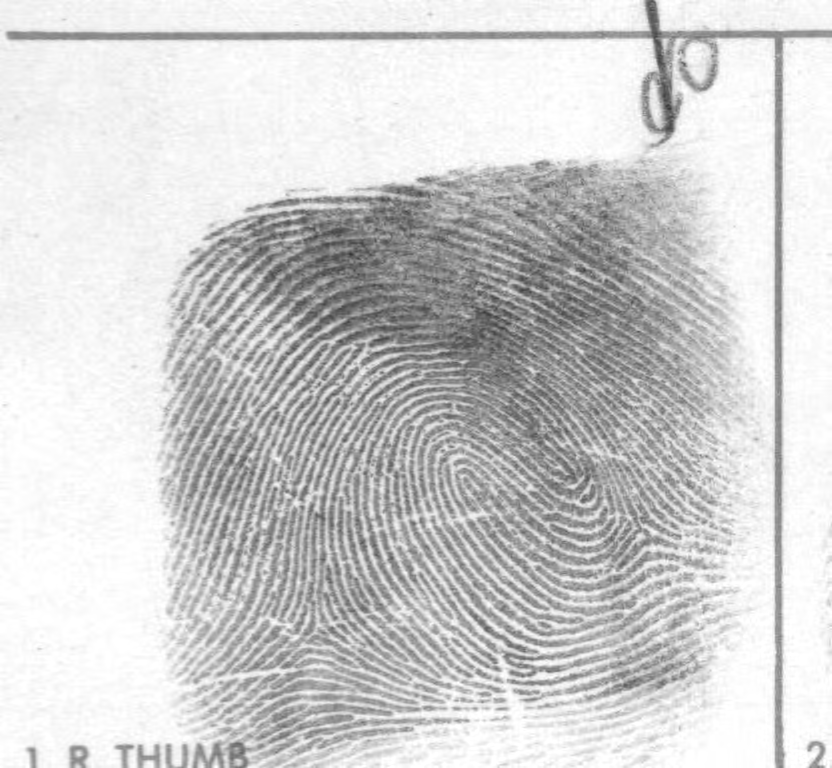

In [109]:

mnt_path = "https://raw.githubusercontent.com/skconan/fingerPrint/master/FingerNet/Minutiae/F0024301.mnt"
img_path = "https://raw.githubusercontent.com/skconan/fingerPrint/master/images/F0024301.png"
    
mnt_point = read_mnt(mnt_path)
    
img = imread(img_path)    
implot(img)
  


Draw Minutiae

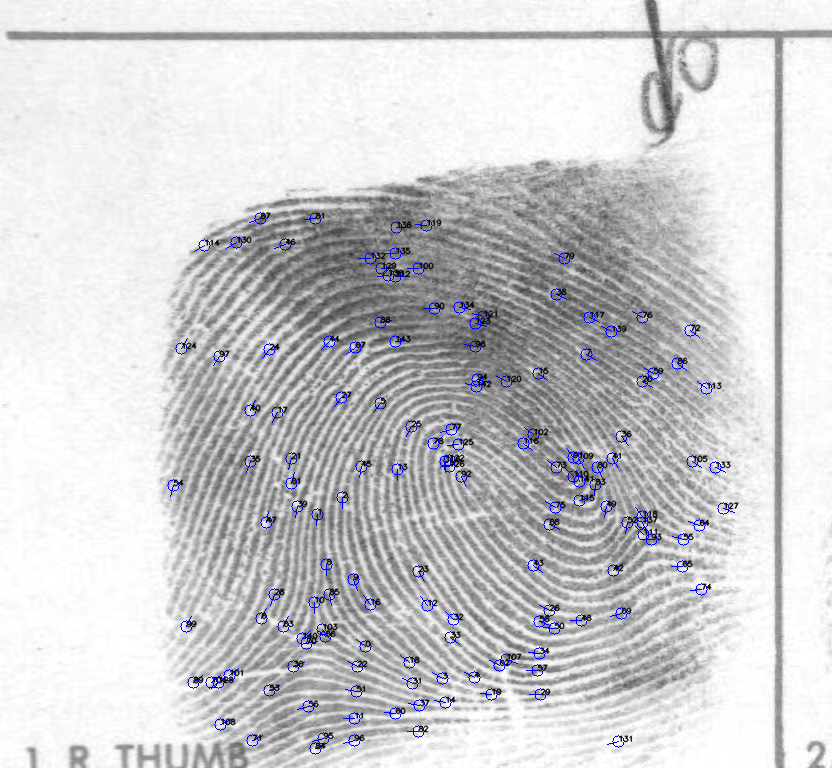

In [110]:
img_with_mnt = draw_mnt(img.copy(), mnt_point)
implot(img_with_mnt)


Group minutiae by radius and radian

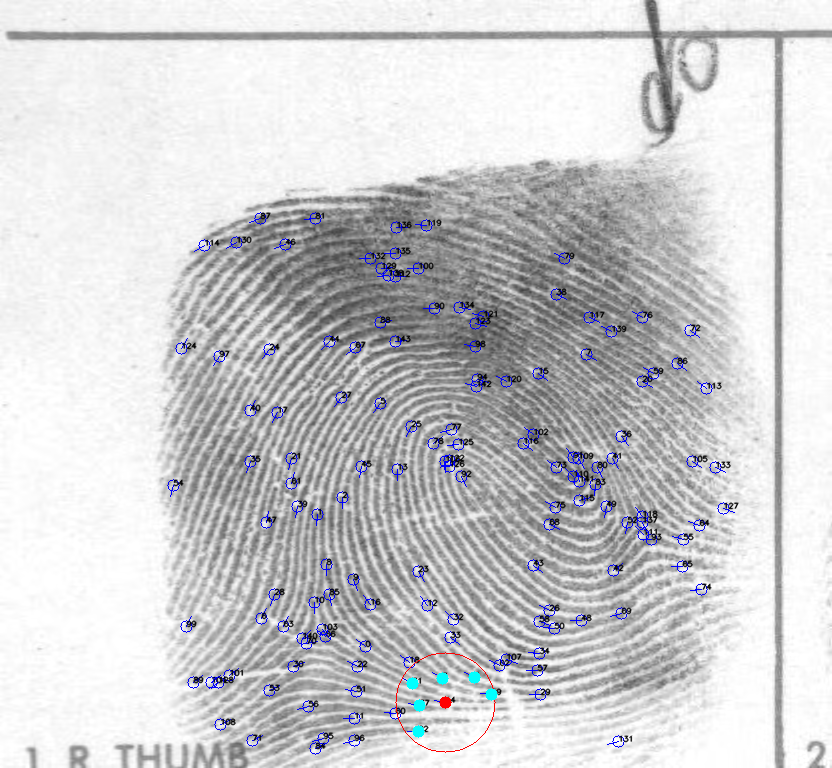

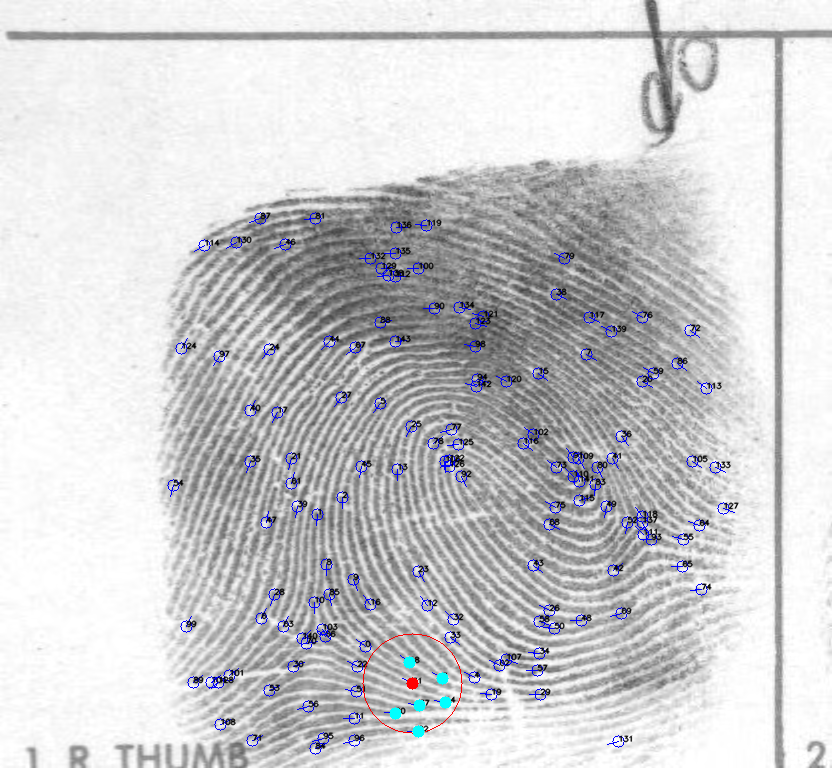

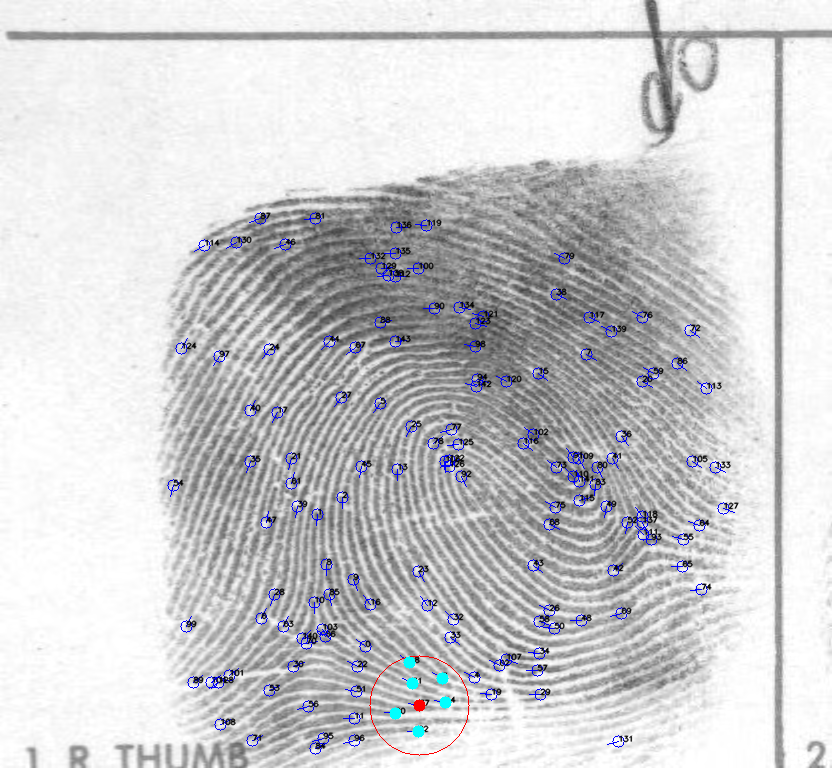

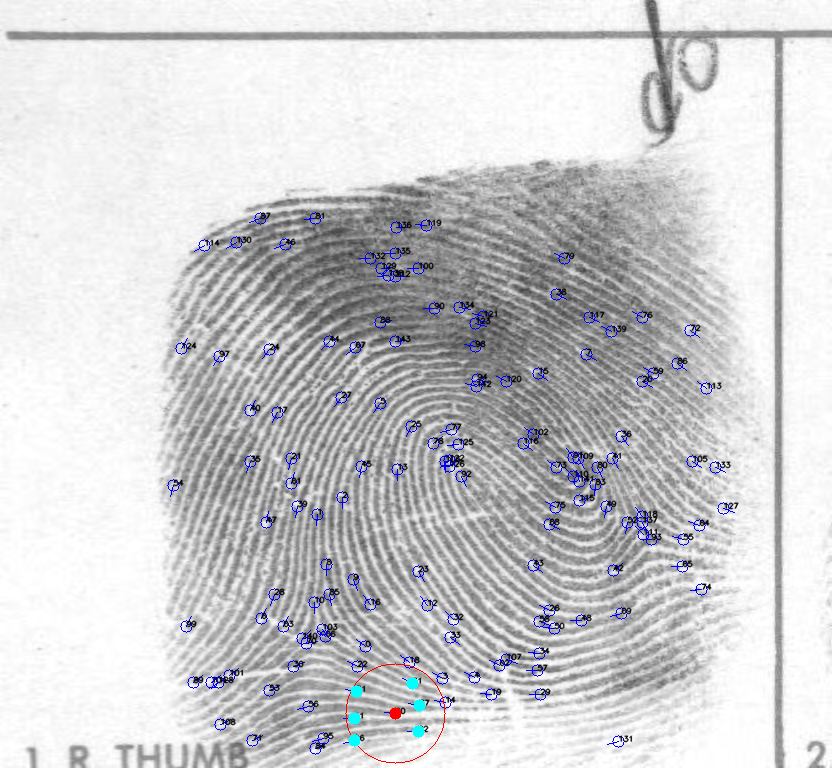

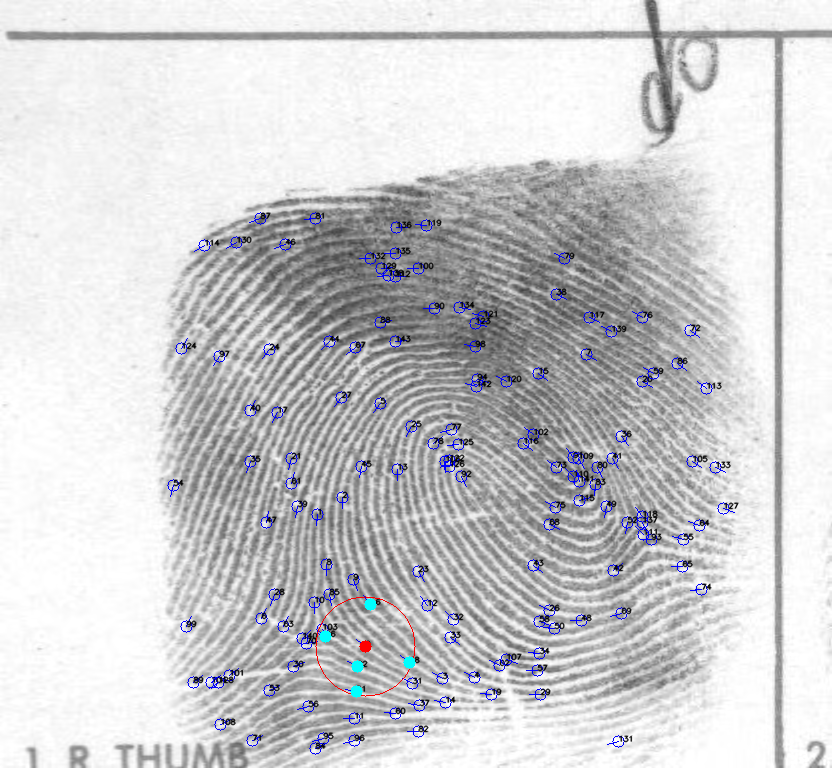

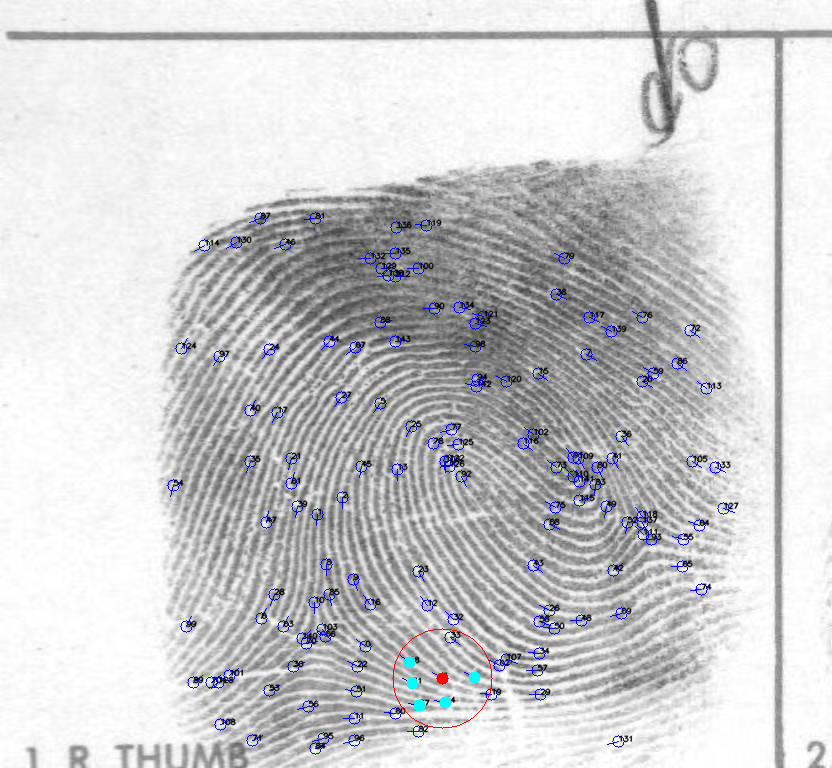

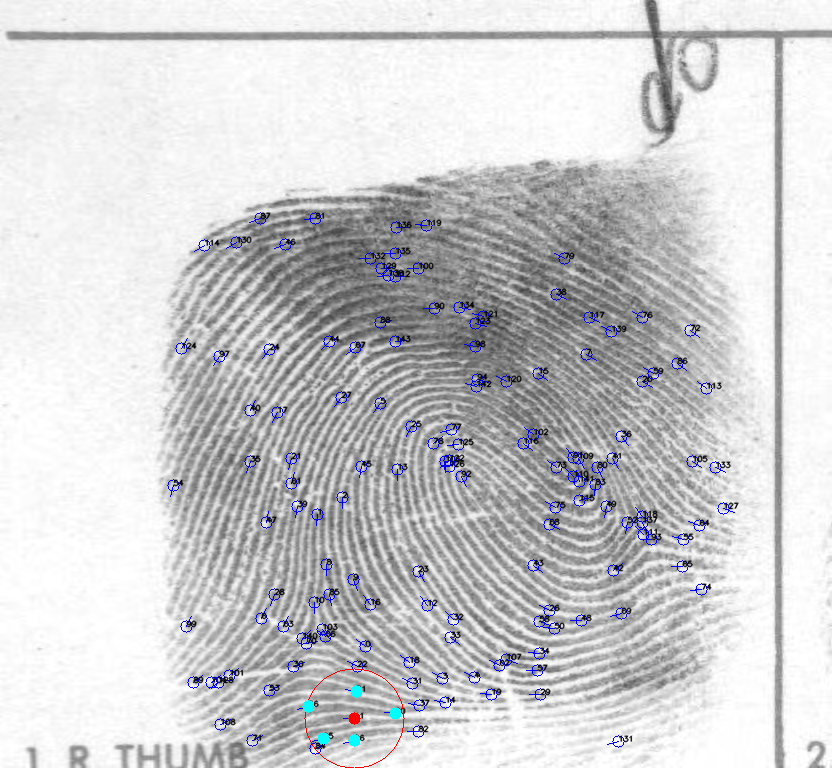

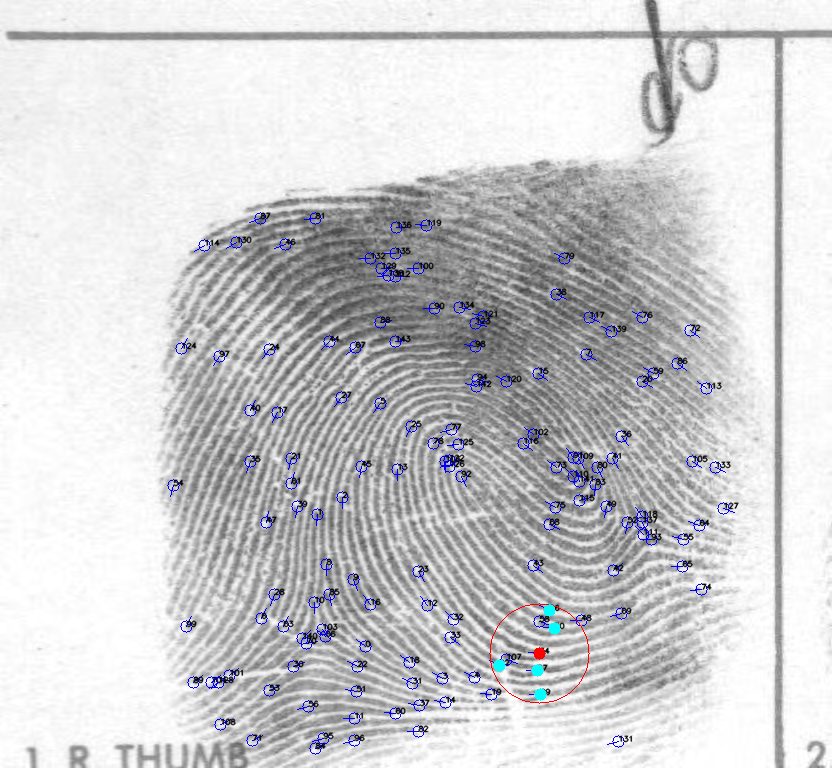

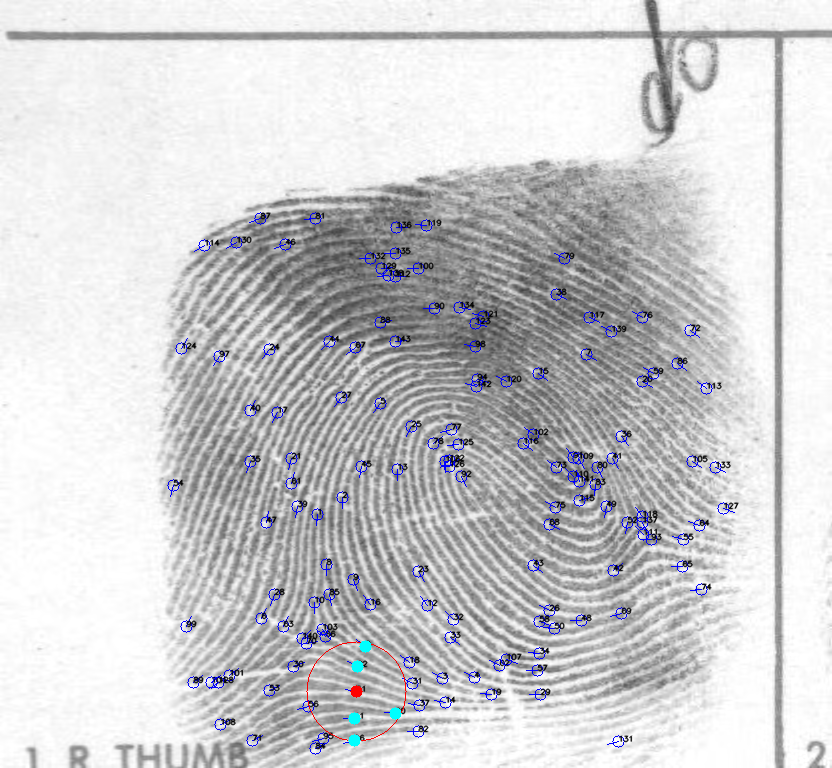

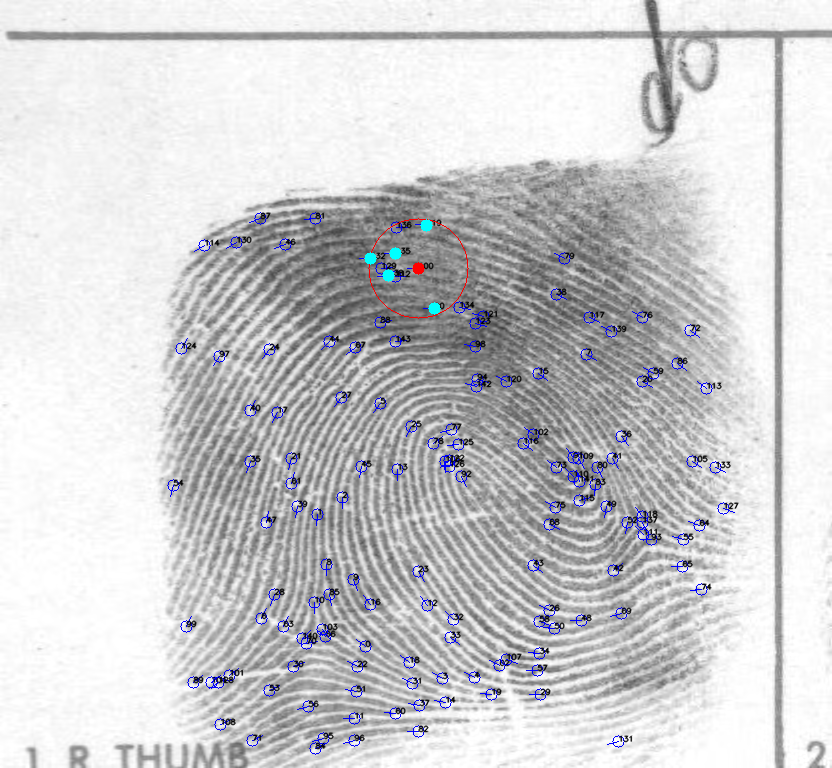

In [111]:
mnt_group = group_minutiae(mnt_point, img_with_mnt)

for mnt in mnt_group[:10]:
  result = img_with_mnt.copy()
  i = mnt['index']
  child = mnt['child']
  mnt = mnt_point[i]
  r = 6
  p = [mnt['x'],mnt['y']]
  cv.circle(result, tuple(p), r, (0,0, 255), -1)
  cv.circle(result, tuple(p), radius_range, (0,0, 255), 1)
            
  for i in child:
    mnt = mnt_point[i]
    p = [mnt['x'],mnt['y']]
    cv.circle(result, tuple(p), r, (255, 255, 0), -1)
   
  implot(result)